# Prediction of Product Sales

- Author: Abdullah Ebaid

## Project Overview

Prediction of Product Sales

## Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import panda
import pandas as pd

In [ ]:
fpath = "/content/drive/MyDrive/Dataset/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [ ]:
# How many columns and rows
df.shape

(8523, 12)

In [ ]:
# Find datastypes
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
# data duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
# Null value
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# Saving list of column names for object cols
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Using the list of obj_cols to fillna
df[obj_cols] = df[obj_cols].fillna('Missing')
df[obj_cols].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Filling null values with -1
df[num_cols] = df[num_cols].fillna(-1)
df[num_cols].isna().sum()

,0
Item_Weight,0
Item_Visibility,0
Item_MRP,0
Outlet_Establishment_Year,0
Item_Outlet_Sales,0


In [ ]:
# Check for remaining missing values
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
# Identify string columns
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Obtain the value counts for all string columns
for col in obj_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
# Standardize the values in the Central column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content']

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Regular
8520,Low Fat
8521,Regular


In [ ]:
# obtain the summary statistics of each numerical columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [ ]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

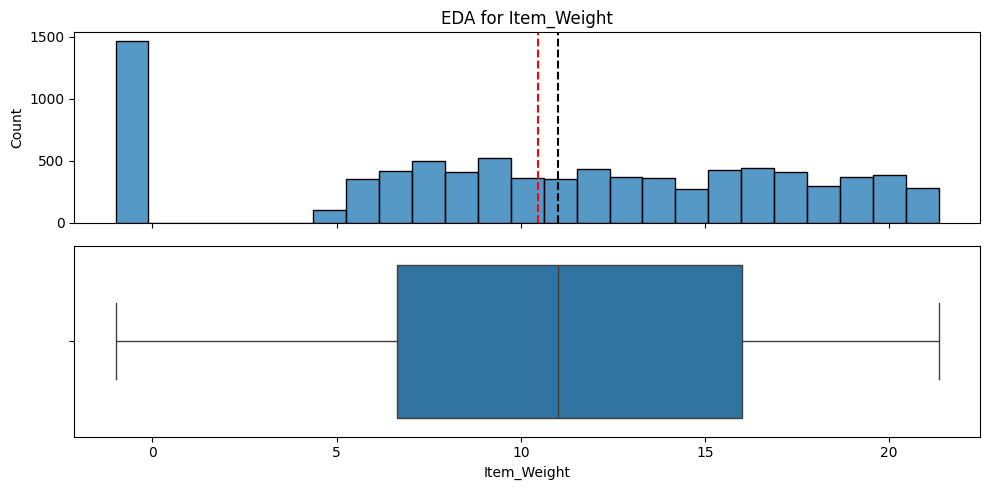

In [ ]:
plot_numeric(df,'Item_Weight')

- Here on the boxplot, we can observe that the Item_Weight column has a fairly symmetric distribution with no apparent outliers.
- However, the histogram reveals a large number of missing or zero values, which might indicate missing data encoded as 0.
- Since weight is a crucial feature for many retail models, I will consider treating these zero values as missing and potentially imputing them using the mean or median.

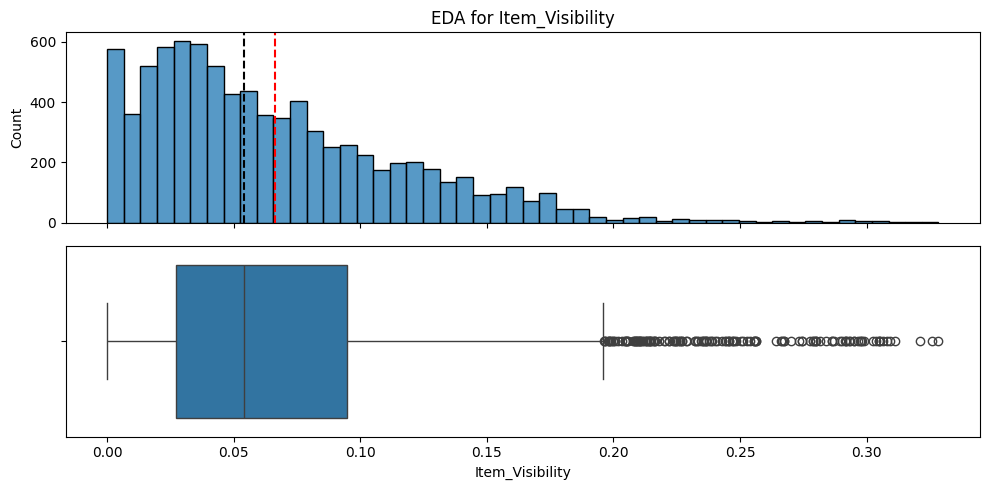

In [ ]:
plot_numeric(df,'Item_Visibility')

- Here on the boxplot, you can clearly see that there are several outliers in the Item_Visibility column.
- These could represent items with unusually high shelf visibility, possibly due to marketing strategies or display placement.
- Interestingly, the histogram also shows that a significant number of items have zero visibility, which may not be realistic.
- Because visibility is likely a key feature in sales prediction, I will consider treating zero values as missing and examine outliers further before deciding whether to cap or transform them.

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y_label='Counts', figsize=(20,5)):
    """EDA function to plot a barplot for the selected column"""
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = data[x].value_counts().sort_values(ascending=False).to_frame(name='count')
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = 'count', ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {x}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {x}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel(y_label, fontsize = 15, fontweight = 'bold')

    return fig,ax

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


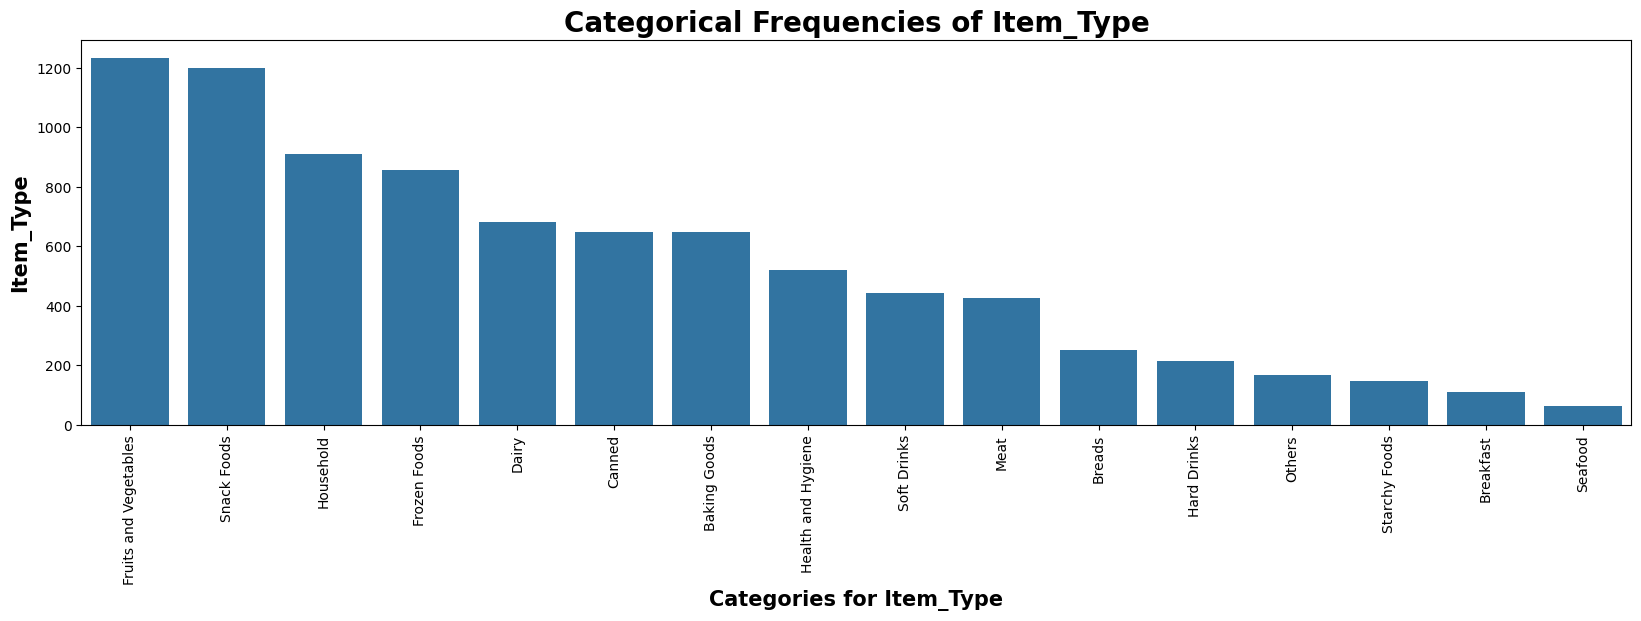

In [ ]:
fig, ax = plot_bar(df,'Item_Type','Item_Type')
print(df['Item_Type'].value_counts())

- From this graph, we can see that the most frequent item type in the dataset is "Fruits and Vegetables", followed closely by "Snack Foods". These categories dominate the distribution of item types.
- On the other hand, the least frequent item types are "Seafood", "Breakfast", and "Starchy Foods", which appear much less often in comparison to the top categories. This suggests that fruits, vegetables, and snacks are the most commonly available or purchased items, while seafood and breakfast items are less represented.

Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: count, dtype: int64


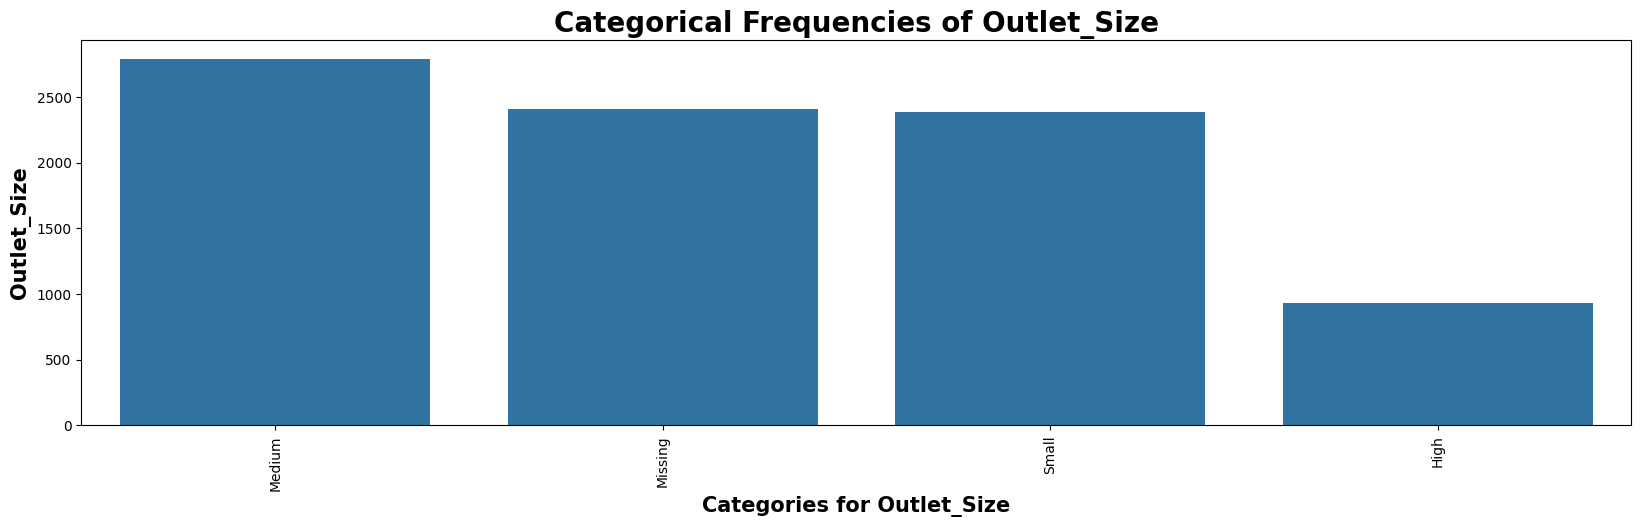

In [ ]:
fig, ax = plot_bar(df,'Outlet_Size','Outlet_Size')
print(df['Outlet_Size'].value_counts())

- From this graph, we can see that the most frequent category for outlet size is "Medium", followed closely by "Missing" and "Small", which have almost equal counts.
- On the other hand, the least frequent outlet size category is "High", indicating that large-sized outlets are relatively rare compared to the other categories.

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64


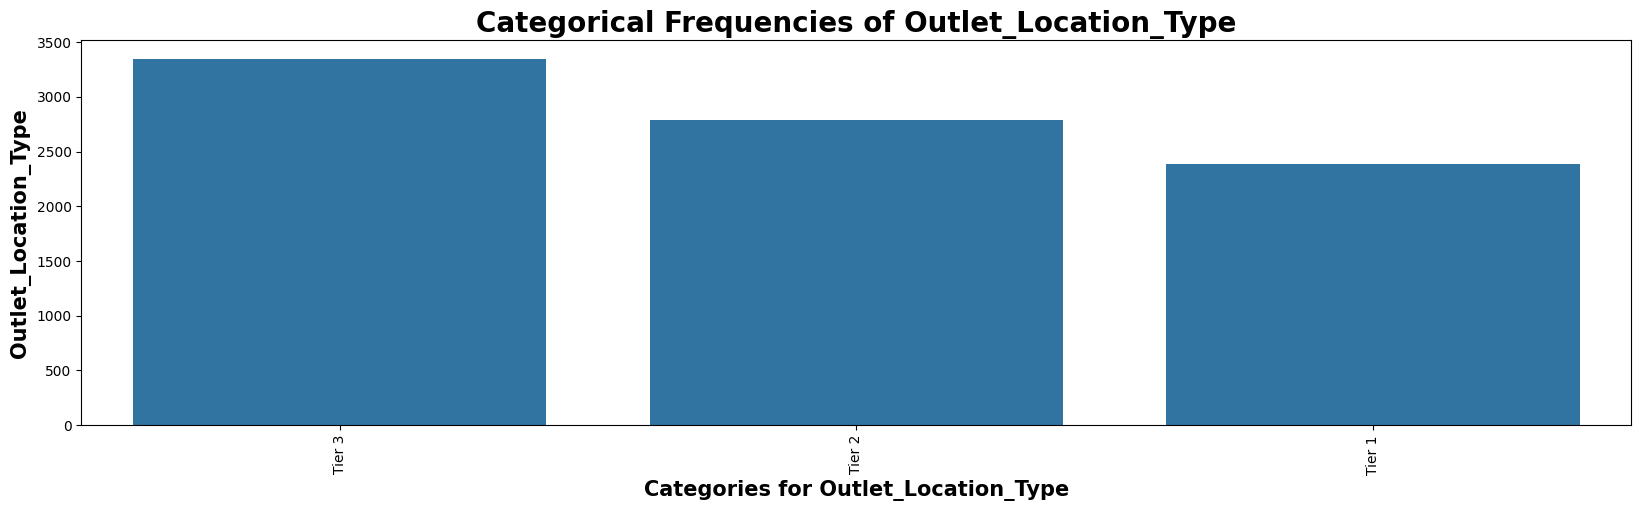

In [ ]:
fig, ax = plot_bar(df,'Outlet_Location_Type','Outlet_Location_Type')
print(df['Outlet_Location_Type'].value_counts())

- From this graph, we can see that the most common outlet location type is "Tier 3", followed by "Tier 2", and finally "Tier 1", which has the lowest frequency.
- This indicates that the majority of outlets are located in Tier 3 areas, while outlets in Tier 1 areas are the least represented in the data.

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64


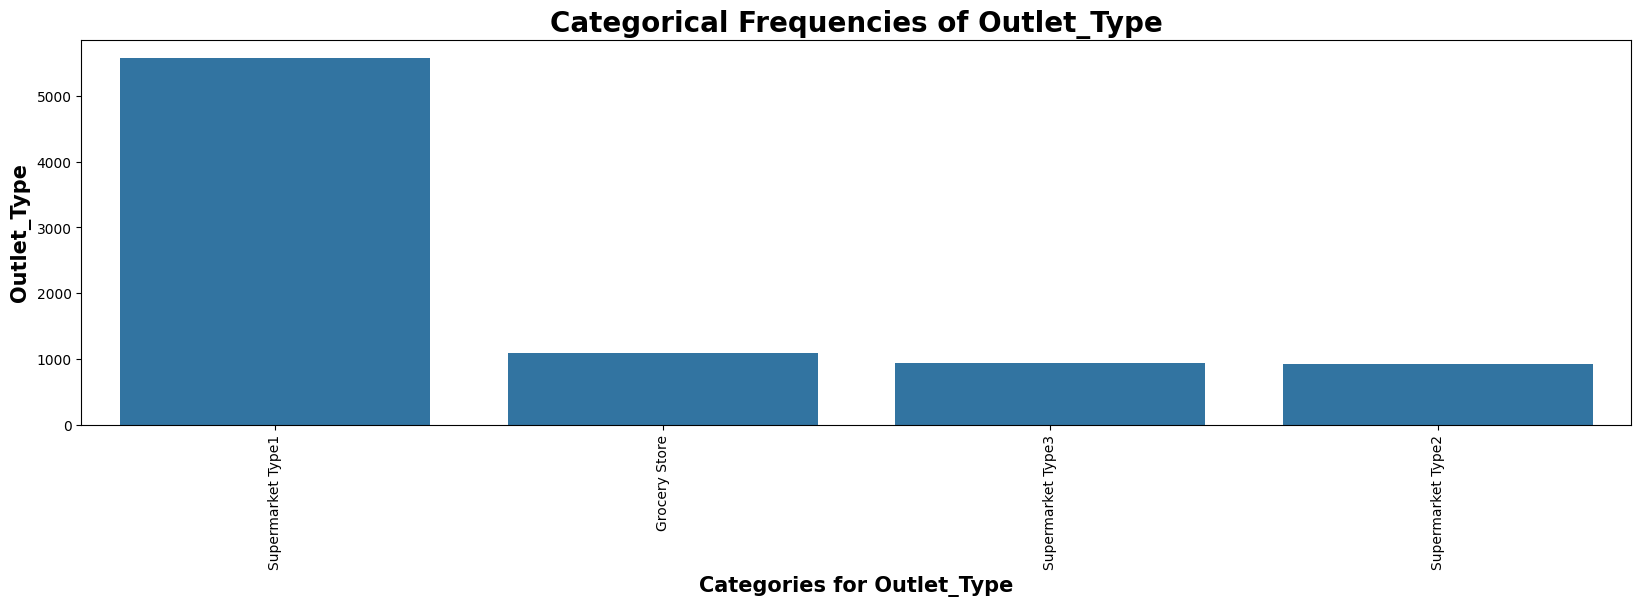

In [ ]:
fig, ax = plot_bar(df,'Outlet_Type','Outlet_Type')
print(df['Outlet_Type'].value_counts())

- From this graph, we can see that "Supermarket Type1" is by far the most common outlet type, with a significantly higher frequency than the other categories.
- The other types — "Grocery Store", "Supermarket Type2", and "Supermarket Type3" — have much lower and relatively similar frequencies, indicating that Type1 dominates the distribution of outlet types.

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


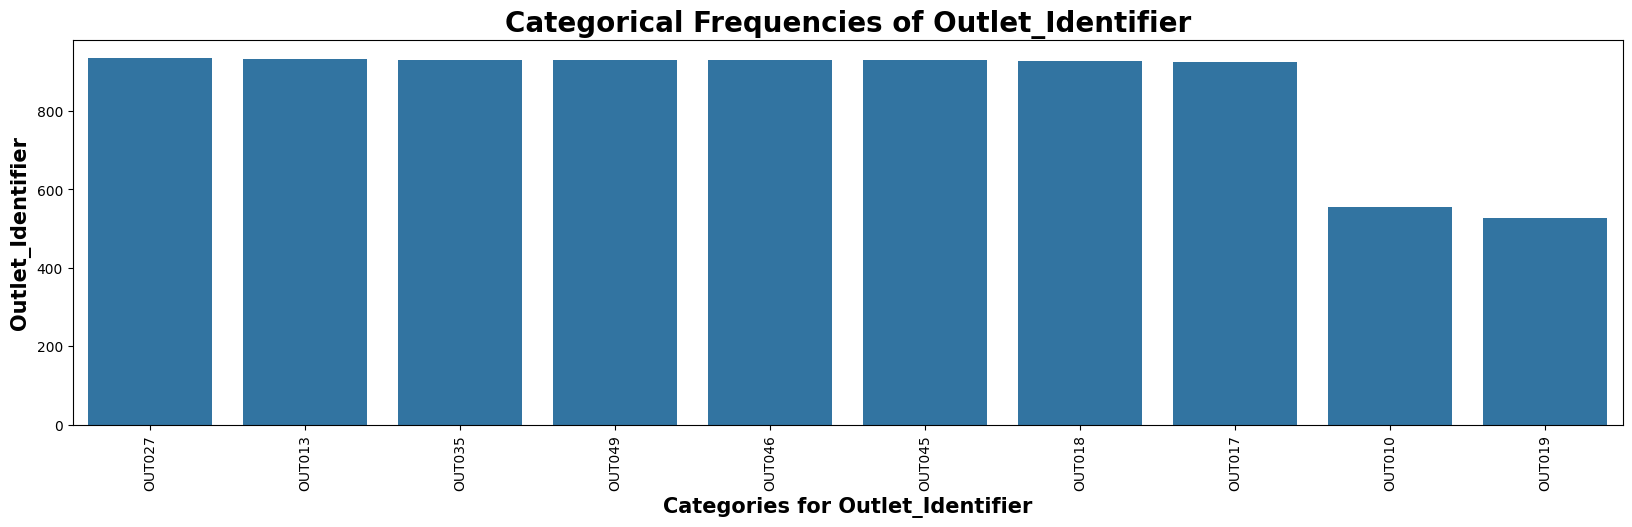

In [ ]:
fig, ax = plot_bar(df,'Outlet_Identifier','Outlet_Identifier')
print(df['Outlet_Identifier'].value_counts())

- From this graph, we can observe that most outlet identifiers (like OUT027, OUT013, etc.) have the same or very similar frequencies, all close to 930 records.
- However, two outlet identifiers — OUT010 and OUT019 — have noticeably lower frequencies, with OUT019 having the least. This suggests these two outlets are underrepresented compared to the others.

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64


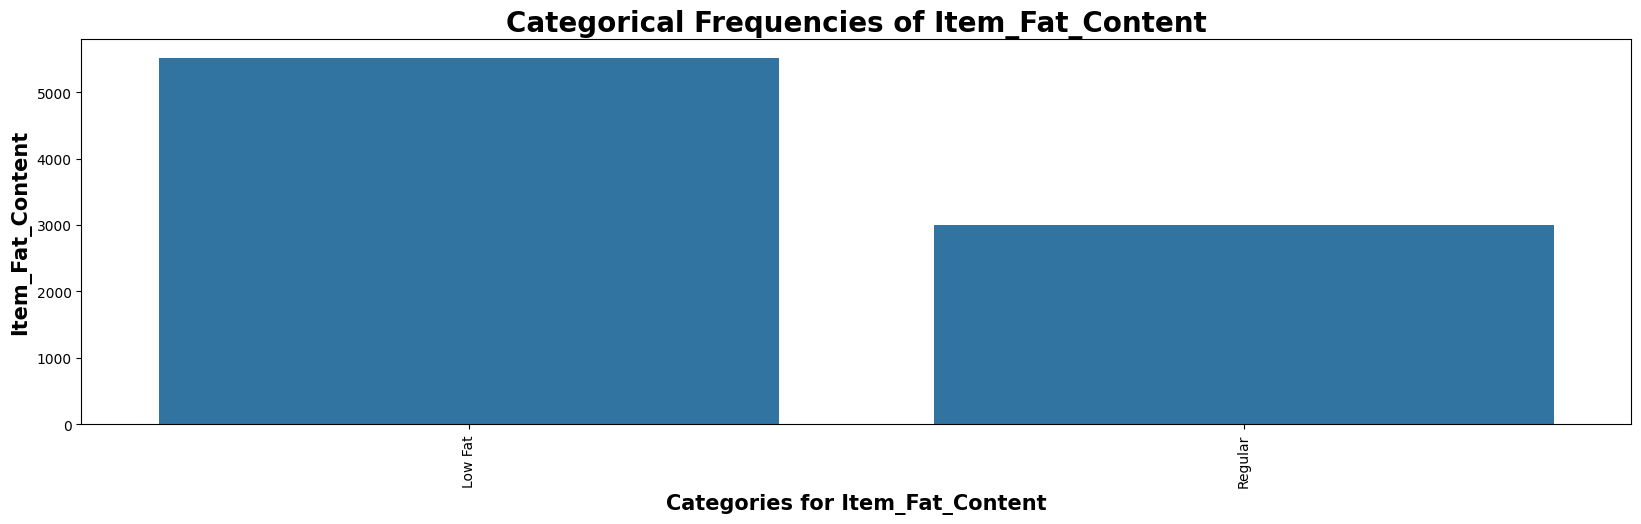

In [ ]:
fig, ax = plot_bar(df,'Item_Fat_Content','Item_Fat_Content')
print(df['Item_Fat_Content'].value_counts())

- From the chart, we can see that the majority of items are labeled as Low Fat, with a count significantly higher than Regular items.
- This suggests that low-fat products are more common or preferred in this dataset.

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64


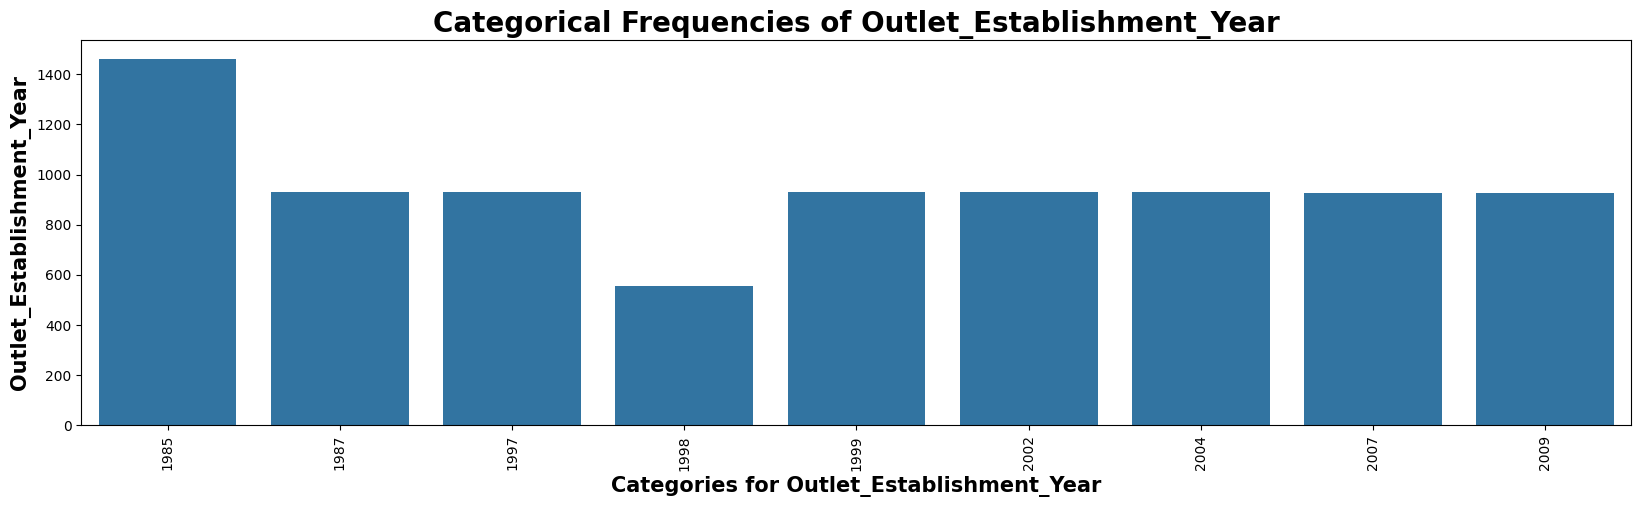

In [ ]:
fig, ax = plot_bar(df,'Outlet_Establishment_Year','Outlet_Establishment_Year')
print(df['Outlet_Establishment_Year'].value_counts())

- From the chart, we observe that the highest number of outlets were established in 1985, with around 1450 entries.
- Other years such as 1987, 1997, 1999, 2002, 2004, 2007, and 2009 have approximately the same frequency, except for 1998, which has the lowest count.

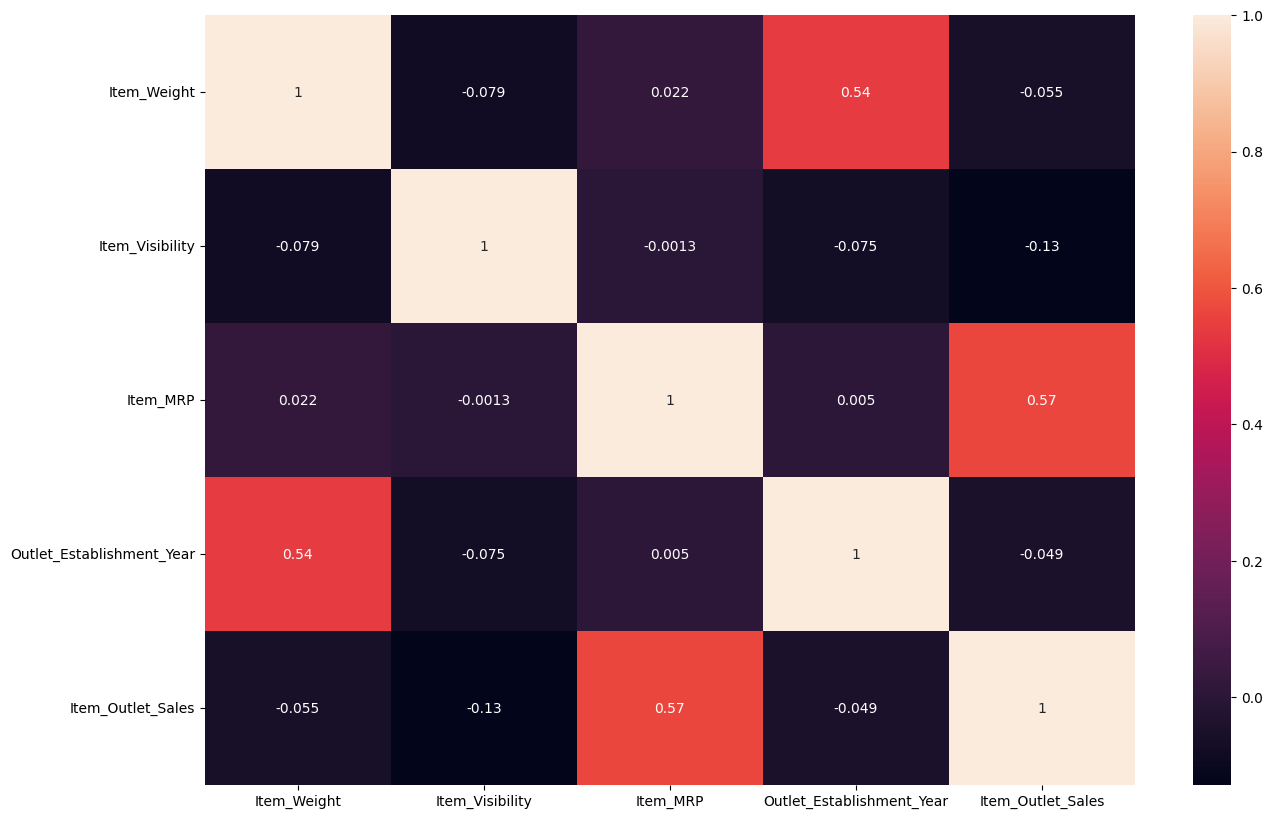

In [ ]:
# Heatmap to view the correlation between features.
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True);

- The heatmap shows Pearson correlation coefficients between numerical variables.
- The strongest correlation is between Item_MRP and Item_Outlet_Sales with a value of 0.57, meaning higher product price is associated with higher sales.
- Variables like Item_Weight, Item_Visibility, and Outlet_Establishment_Year have very weak or no correlation with sales.
- There is a moderate correlation (0.54) between Item_Weight and Outlet_Establishment_Year, which might indicate a relationship between product weight and store establishment year.
- Overall, price is the most influential factor on product sales in this dataset.

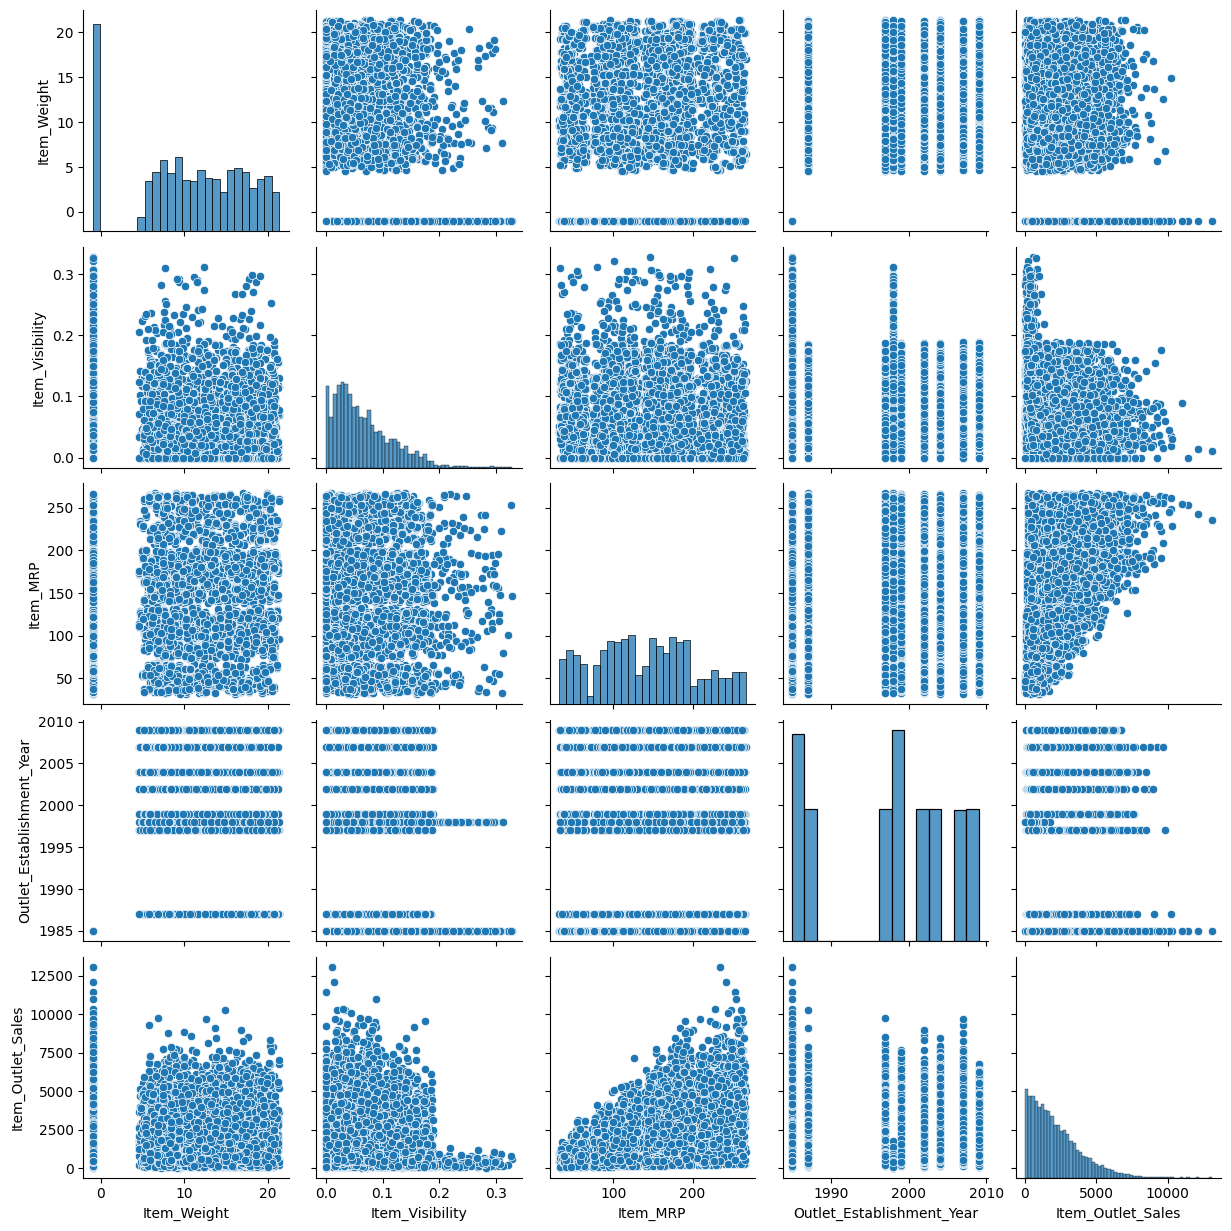

In [ ]:
sns.pairplot(df.select_dtypes('number'));

- This is a pairplot showing relationships and distributions among five variables:
  - Item_Weight
  - Item_Visibility
  - Item_MRP (Maximum Retail Price)
  - Outlet_Establishment_Year
  - Item_Outlet_Sales

- Observations:
  - The diagonal plots show the distribution of each variable. For example, Item_Visibility is skewed right with many low visibility values.
  - Scatter plots between variables show potential correlations:
    - Item_MRP and Item_Outlet_Sales have a positive trend, confirming the moderate positive correlation seen earlier.
    - Item_Weight vs. Outlet_Establishment_Year shows some clustering, possibly due to discrete store opening years.

  - Outlet_Establishment_Year appears categorical or discrete, with distinct horizontal lines in scatter plots.
  - Most other variable pairs don’t show clear trends, indicating weak or no correlation.

## Feature Inspection

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Answer the following questions:
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
     - Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type are categorical (mostly nominal).
     - Outlet_Size and Outlet_Location_Type can be considered ordinal because they have an implied order (e.g., size: Small < Medium < High).
     - Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales are numeric (continuous).
     - Outlet_Establishment_Year is numeric (discrete), and could be ordinal depending on use.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
     - The feature Outlet_Size has around 28% missing values. Other features like Item_Weight may also have a few missing values depending on the dataset version.
     - What to do?
      - If the feature is important: Impute missing values using the mode (most frequent value) for categorical, or mean/median for numeric.
      - If the feature is not useful or has too many missing values: consider dropping the column.

3. Is the feature constant or quasi-constant?  
  Most features in the dataset are not constant. However, some features like Item_Fat_Content may behave as quasi-constant if they have one dominant value (e.g., "Low Fat"). We need to check their distribution to be sure.

4. What is the cardinality? Is it high (>10)?
  - Item_Identifier has very high cardinality (over 1500 unique values).
  - Item_Type has moderate cardinality (~16).
  - Other features like Outlet_Identifier have low cardinality (10 or less).  
Yes, some features do have high cardinality.

5. Would we know this feature before the target is determined?  
  Yes. All features except the target (Item_Outlet_Sales) are known before the target is observed. This makes them valid predictors for a machine learning model.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Item_Identifier may be excluded or transformed, as it has high cardinality and may not contribute meaningfully unless grouped by item category.
  - Outlet_Identifier might also be encoded or excluded if not relevant to generalization.
  - Other features generally have business relevance and should be kept.

### Create a multivariate visualization plotting each feature vs. the target.

In [ ]:
means = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
means.sort_values(ascending=False)

,Item_Outlet_Sales
Item_Type,
Starchy Foods,2374.332773
Seafood,2326.065928
Fruits and Vegetables,2289.009592
Snack Foods,2277.321739
Household,2258.784300
Dairy,2232.542597
Canned,2225.194904
Breads,2204.132226
Meat,2158.977911


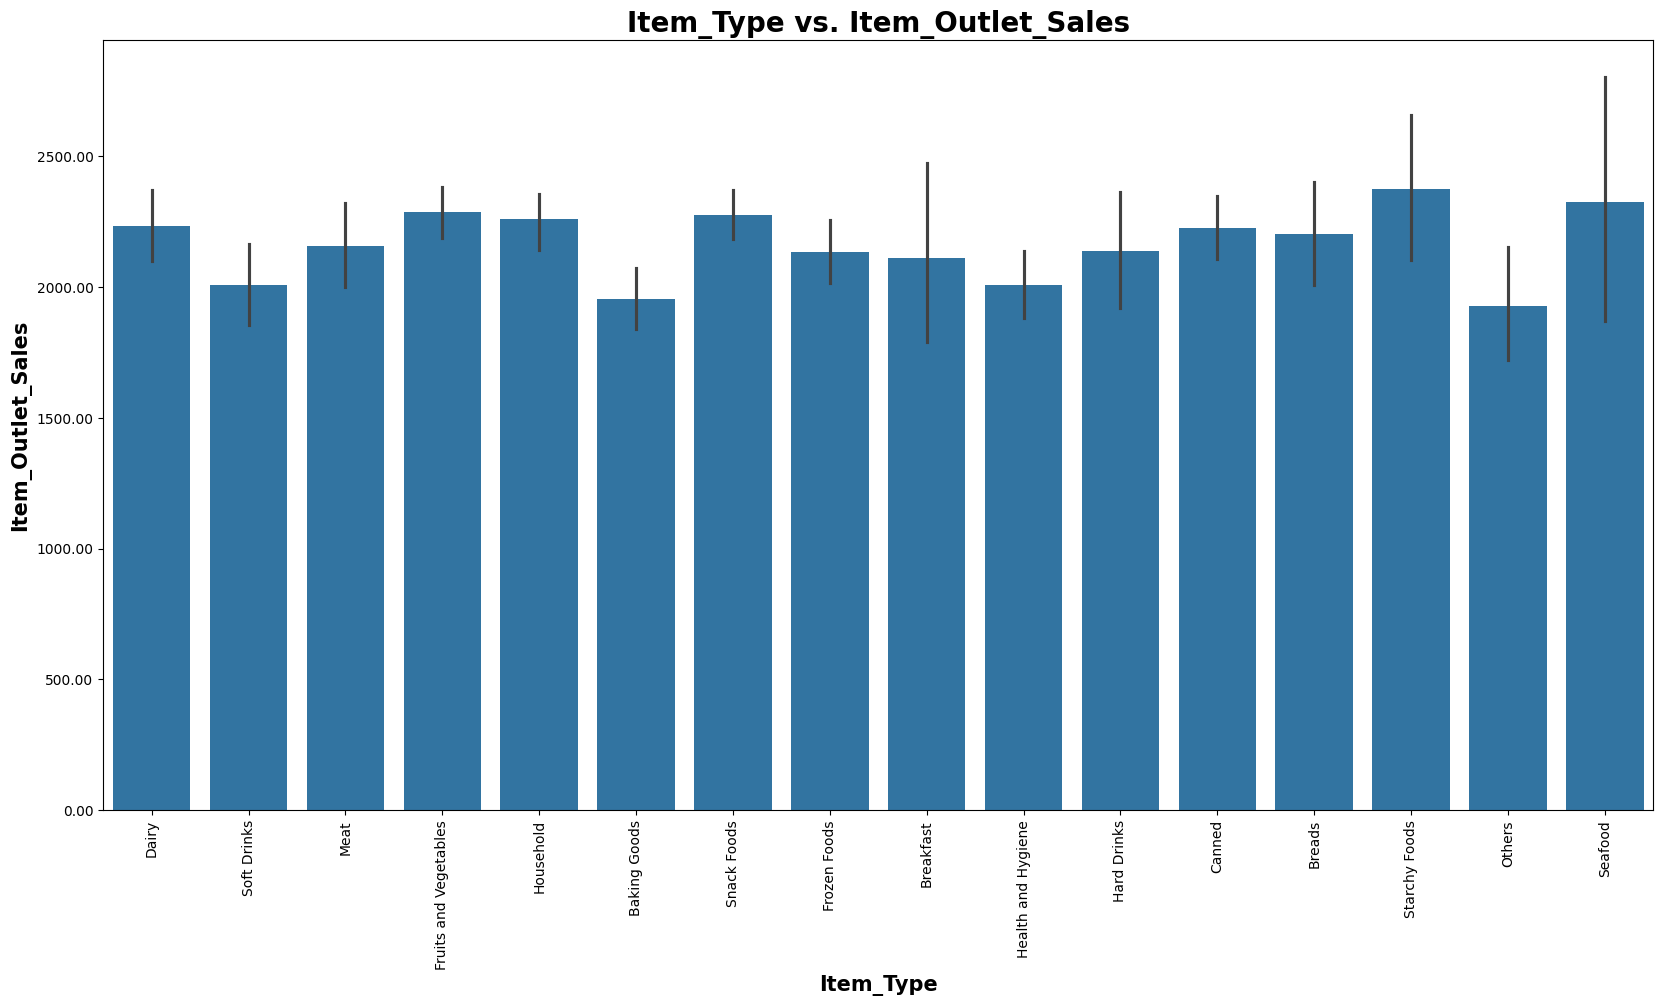

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', ax=ax)
plt.xticks(rotation= 90)
ax.set_title(f'Item_Type vs. Item_Outlet_Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel(f'Item_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

- The top five item types with the highest average outlet sales are as follows:
  - Starchy Foods: ~2,390
  - Seafood: ~2,330
  - Fruits and Vegetables: ~2,300
  - Snack Foods: ~2,300
  - Household: ~2,270

- The bottom five item types with the lowest average outlet sales are as follows:
  - Others: ~1,930
  - Baking Goods: ~1,960
  - Soft Drinks: ~2,010
  - Health and Hygiene: ~2,020
  - Breakfast: ~2,120

In [ ]:
means2 = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
means2.sort_values(ascending=False)

,Item_Outlet_Sales
Outlet_Type,
Supermarket Type3,3694.038558
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Grocery Store,339.828500


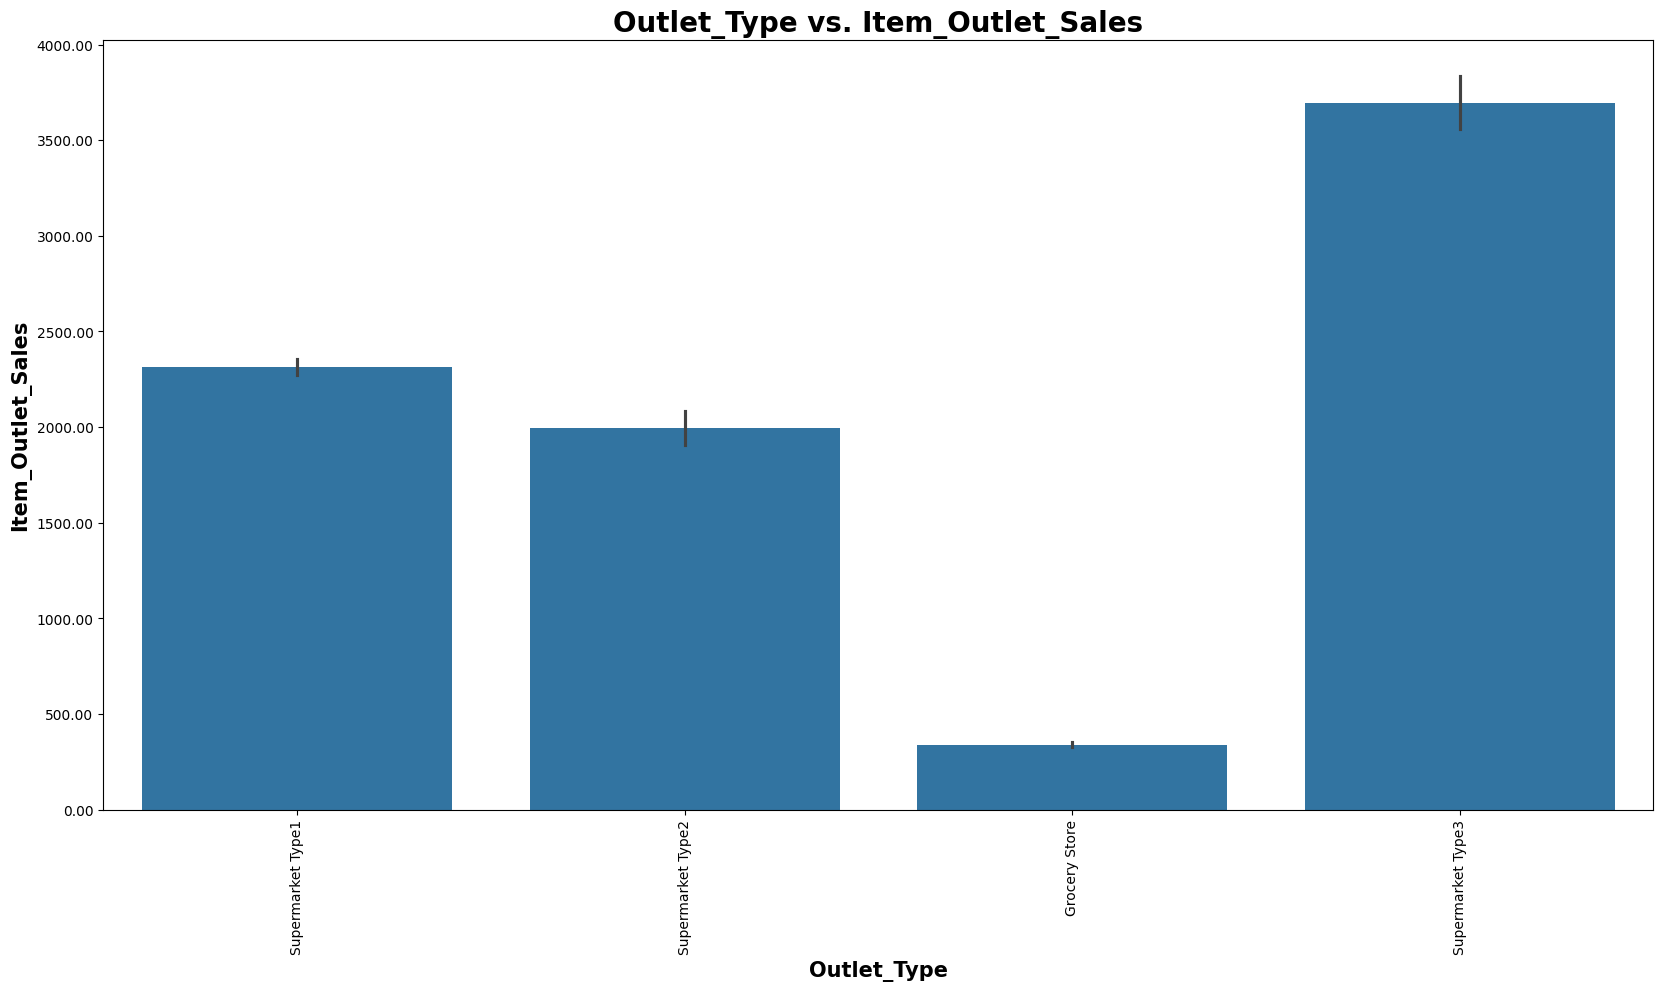

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=ax)
plt.xticks(rotation= 90)
ax.set_title(f'Outlet_Type vs. Item_Outlet_Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel(f'Outlet_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

The average item outlet sales across different outlet types are as follows (from highest to lowest):
   - Supermarket Type3: ~3,700
   - Supermarket Type1: ~2,300
   - Supermarket Type2: ~2,000
   - Grocery Store: ~350
   
The highest performing outlet type is Supermarket Type3, while Grocery Store records the lowest average item outlet sales by a significant margin.

In [ ]:
df['Outlet_Establishment_Year'].value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


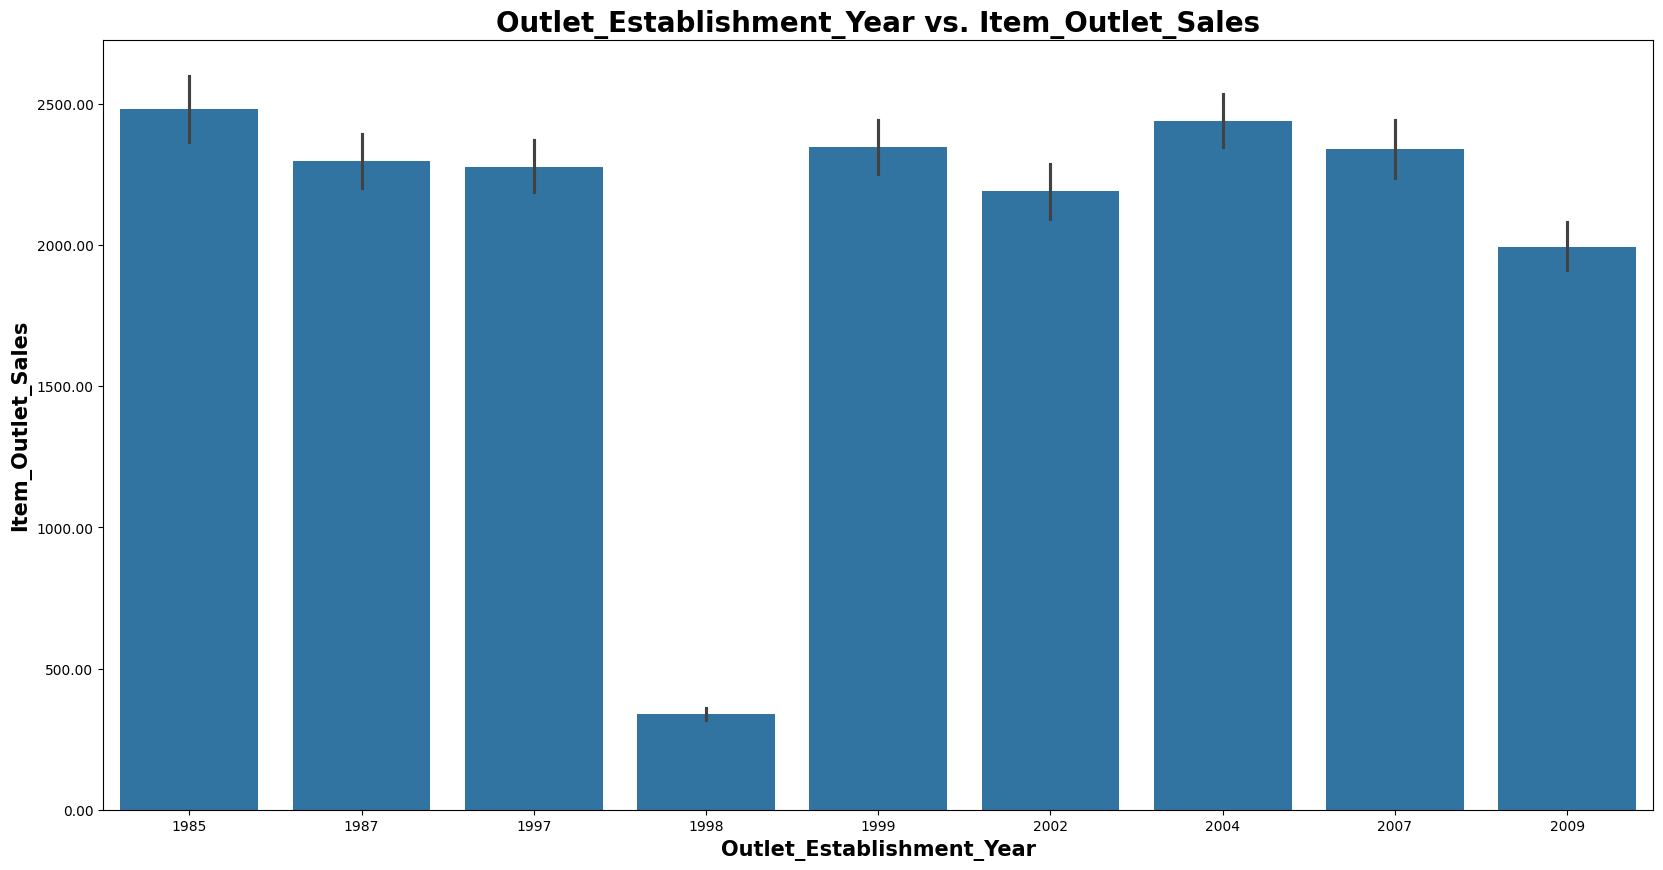

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales', ax=ax)
ax.set_title(f'Outlet_Establishment_Year vs. Item_Outlet_Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel(f'Outlet_Establishment_Year', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

- The outlets established in 1985, 2004, and 1999 have the highest average item outlet sales, suggesting that more established or larger outlets might perform better.
- The year 1998 stands out with extremely low sales, which may indicate an underperforming outlet or data anomaly.

In [ ]:
df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


/tmp/ipython-input-982947691.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  l = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipython-input-982947691.py:8: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=3)


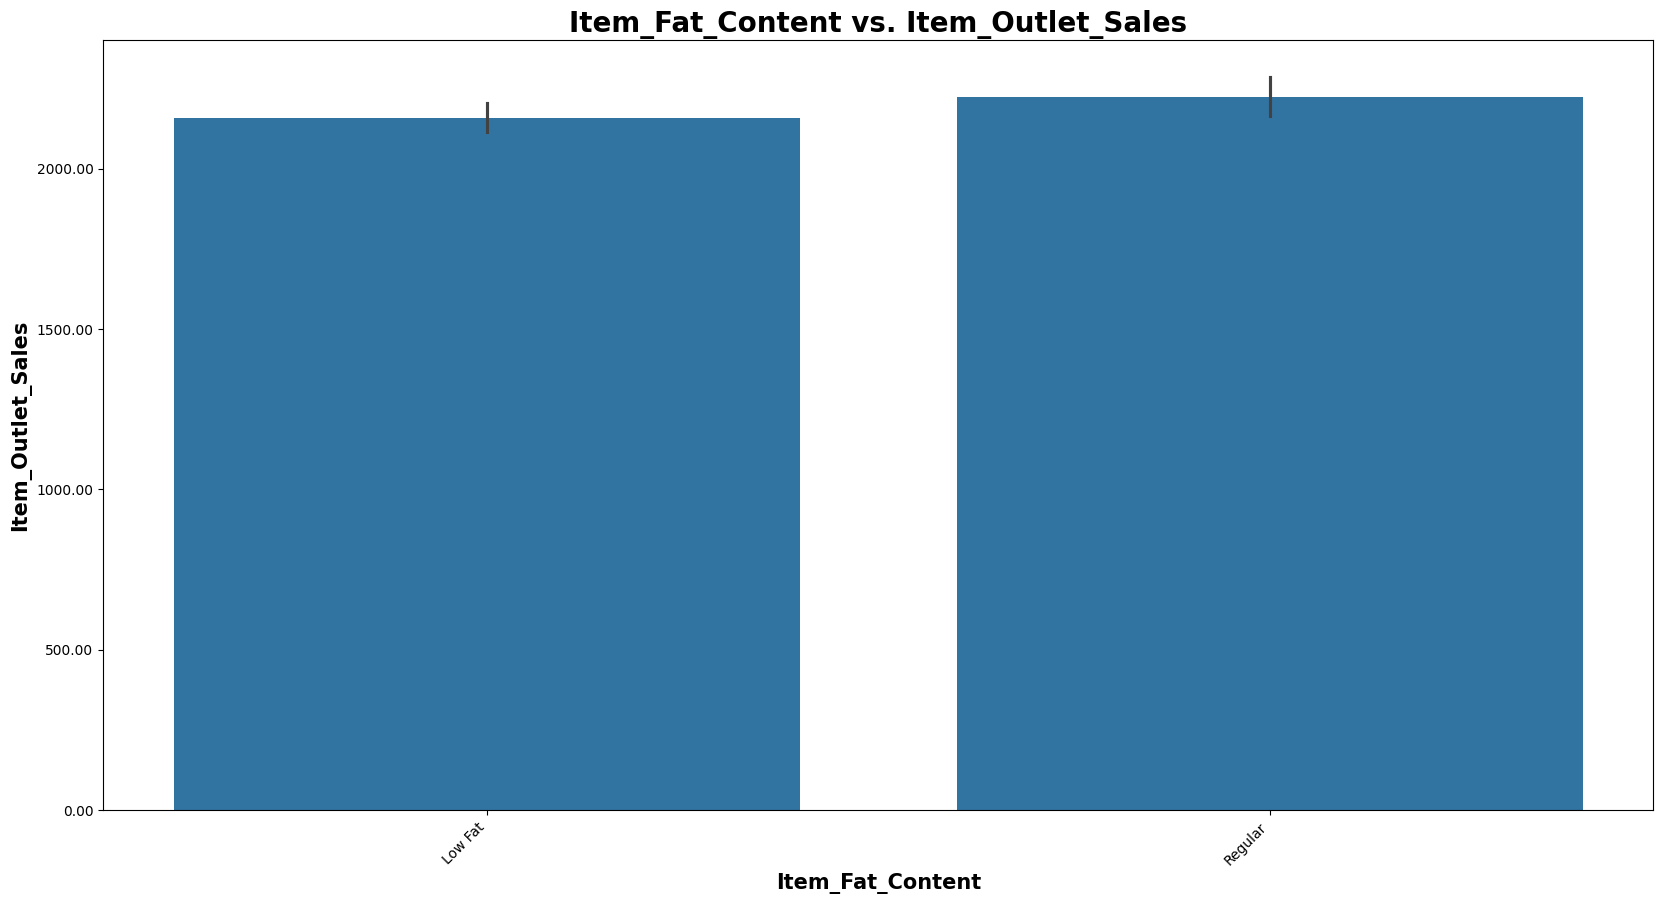

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', ax=ax)
l = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
label = ['Low Fat, Reqular']

ax.set_title(f'Item_Fat_Content vs. Item_Outlet_Sales', fontsize = 20, fontweight = 'bold');
plt.locator_params(axis='x', nbins=3)

ax.set_xlabel(f'Item_Fat_Content', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

There is only a slight difference in average item outlet sales between products with different fat content:
- Regular fat items have slightly higher average sales (~2250).
- Low Fat items have slightly lower average sales (~2190).

The difference is minimal, indicating that fat content may not be a significant factor in influencing sales.

In [ ]:
df['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


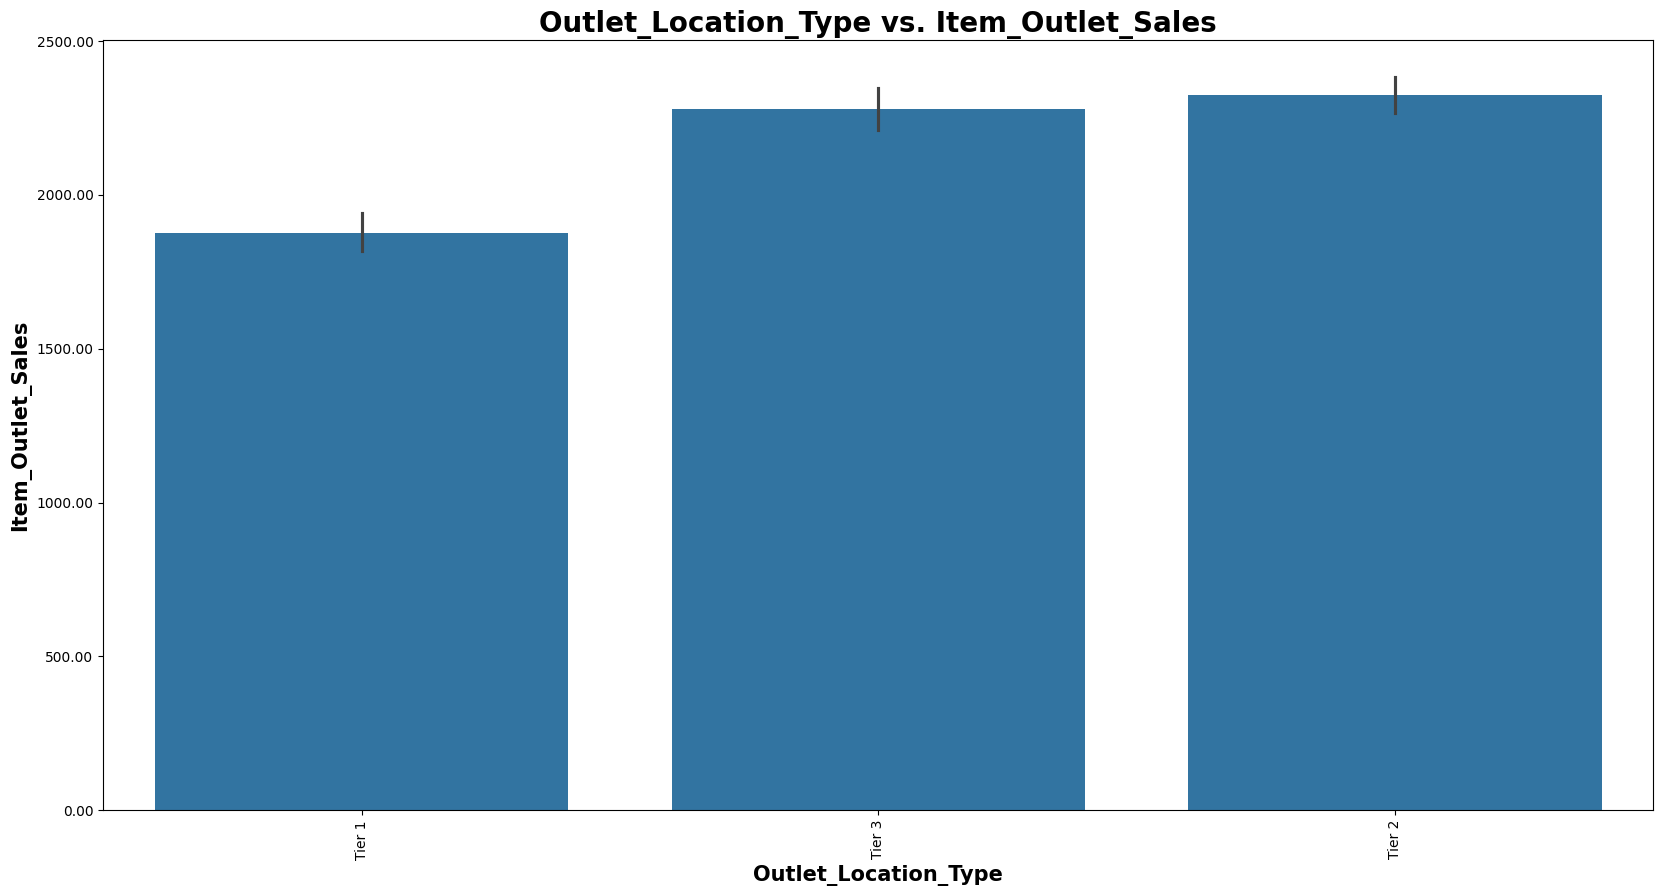

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=ax)

plt.xticks(rotation= 90)
ax.set_title(f'Outlet_Location_Type vs. Item_Outlet_Sales', fontsize = 20, fontweight = 'bold');
ax.set_xlabel(f'Outlet_Location_Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15, fontweight = 'bold')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
plt.show()

The average item outlet sales vary by outlet location tier:
- Tier 2: Highest average sales (~2,320)
- Tier 3: Slightly lower than Tier 2 (~2,280)
- Tier 1: Lowest average sales (~1,880)

This suggests that outlets in more urban or developed areas (Tier 2 and 3) tend to achieve higher average sales compared to less developed or rural areas (Tier 1).

## Preprocesing for Machine Learning

In [ ]:
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Performing Preprocessing Steps

In [ ]:
# Dropping Item_Identifier
df.drop(columns='Item_Identifier', inplace=True)

In [ ]:
# Checking for Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking missing values
df.isna().sum()

,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [ ]:
# replacing inconsistent categories in Item_Type column
# then checking to make sure the change took place
df['Item_Type'] = df['Item_Type'].replace('FD', 'Food')
df['Item_Type'] = df['Item_Type'].replace('DR', 'Drinks')
df['Item_Type'] = df['Item_Type'].replace('NC', 'Non-Consumable')
df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


### Defining X and y

In [ ]:
# Define X and y
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [ ]:
# Drop unwanted/inappropriate columns
bad_cols = ['Outlet_Identifier', 'Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Missing,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1


### Train-Test-Split

In [ ]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Making a Preprocessing Pipeline

In [ ]:
# Creating a categorical data selector
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
# Creating a pipline for handling categorical data
impute_cat = SimpleImputer(strategy='most_frequent')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

cat_pipe = make_pipeline(impute_cat, ohe_encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
# Test cat_pipe
cat_pipe.fit_transform(X_train[cat_selector(X_train)])

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
# Creating a numeric data selector
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [ ]:
# Creating scaler object to scale the data
scaler = StandardScaler()

In [ ]:
# Test num_pipe
scaler.fit_transform(X_train[num_selector(X_train)])

array([[ 0.86818714, -0.71277507,  1.82810922],
       [ 0.70503837, -1.29105225,  0.60336888],
       [ 0.27491887,  1.81331864,  0.24454056],
       ...,
       [ 1.05358348, -0.92052713,  1.52302674],
       [ 1.46145542, -0.2277552 , -0.38377708],
       [ 0.86818714, -0.95867683, -0.73836105]])

In [ ]:
# Combine into 1 column transformer
preprocessor = make_column_transformer(
    (cat_pipe, cat_selector),
    (scaler, num_selector)
)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4de6e190>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4f099950>)])

In [ ]:
# Test Col Transformer
preprocessor.fit_transform(X_train)

array([[ 1.        ,  0.        ,  0.        , ...,  0.86818714,
        -0.71277507,  1.82810922],
       [ 0.        ,  1.        ,  0.        , ...,  0.70503837,
        -1.29105225,  0.60336888],
       [ 0.        ,  1.        ,  0.        , ...,  0.27491887,
         1.81331864,  0.24454056],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.05358348,
        -0.92052713,  1.52302674],
       [ 1.        ,  0.        ,  0.        , ...,  1.46145542,
        -0.2277552 , -0.38377708],
       [ 1.        ,  0.        ,  0.        , ...,  0.86818714,
        -0.95867683, -0.73836105]])

In [ ]:
# Check type for preprocessor
type(preprocessor)

sklearn.compose._column_transformer.ColumnTransformer

### Training the Models

#### Liner Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [ ]:
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4de6e190>),
                                ('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4f099950>)])

In [ ]:
# Make and fit model
linreg_pipe = make_pipeline(preprocessor,LinearRegression())
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4de6e190>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4f099950>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# Get predictions to use to evaluate model
y_pred_train = linreg_pipe.predict(X_train)
y_pred_test = linreg_pipe.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated

  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """

  r2 = r2_score(y_true,y_pred)
  mae = mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)


  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - MAE = {round(mae,3)}")
  print(f"  - MSE = {round(mse,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [ ]:
# Evaluate model's performance
evaluate_model(y_train, y_pred_train, split='training')
evaluate_model(y_test, y_pred_test, split='test')

Results for training data:
  - R^2 = 0.561
  - MAE = 847.101
  - MSE = 1298649.615
  - RMSE = 1139.583

Results for test data:
  - R^2 = 0.566
  - MAE = 805.656
  - MSE = 1197423.575
  - RMSE = 1094.269



The model demonstrates moderate predictive performance, with an R² score of approximately 0.56 on both the training and test datasets. This indicates that around 56% of the variance in the target variable is explained by the model. The relatively close values of MAE, MSE, and RMSE across training and testing sets suggest that the model is not overfitting and generalizes reasonably well. However, the level of error, particularly the RMSE (around 1,094 on the test set), may still be considered high depending on the scale and importance of the target variable. These results suggest that while the model is stable, there is room for improvement through techniques.

#### Tree Regression

In [ ]:
# Make and fit model
tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor(random_state=42))
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4de6e190>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7aba4f099950>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# Get predictions for training and test data
y_pred_train = tree_pipe.predict(X_train)
y_pred_test = tree_pipe.predict(X_test)

In [ ]:
# Evaluate model's performance
evaluate_model(y_train, y_pred_train, split='training')
evaluate_model(y_test, y_pred_test, split='test')

Results for training data:
  - R^2 = 1.0
  - MAE = 0.0
  - MSE = 0.0
  - RMSE = 0.0

Results for test data:
  - R^2 = 0.161
  - MAE = 1045.968
  - MSE = 2314579.403
  - RMSE = 1521.374



The model shows signs of severe overfitting. On the training data, it achieves perfect performance, with an R² of 1.0 and zero error across all metrics (MAE, MSE, RMSE), indicating that it has memorized the training data entirely. However, on the test data, the model performs poorly, with a low R² of 0.161 and high error values, including an RMSE of 1521.37. This significant drop in performance from training to testing suggests that the model does not generalize well to unseen data.

### Creating a Loop to Tune Depth for Decision Tree Regressor Model

In [ ]:
#create a range of max_depth values
depths = range(1, 21) # Set a reasonable range for max_depth

#create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train R2', 'Test R2'], index=depths) # Add Test R2 column

#loop through the max_depth values
for n in depths:
  # fit a new model with max_depth
  model = DecisionTreeRegressor(max_depth=n, random_state=42) # Create the model with the current depth
  tree_pipe = make_pipeline(preprocessor, model) # put the model into a pipeline

  # fit the model
  tree_pipe.fit(X_train, y_train)

  # get predictions
  y_pred_train = tree_pipe.predict(X_train)
  y_pred_test = tree_pipe.predict(X_test)

  # evaluate the model using R2 Score
  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  #store the scores in the scores dataframe
  scores.loc[n, 'Train R2'] = train_r2
  scores.loc[n, 'Test R2'] = test_r2

In [ ]:
scores

,Train R2,Test R2
1,0.237797,0.229683
2,0.431641,0.433778
3,0.524218,0.524222
4,0.582633,0.583877
5,0.603891,0.594655
6,0.615046,0.582234
7,0.626413,0.578689
8,0.642772,0.563639
9,0.66372,0.553795
10,0.684119,0.532785


#### Plotting Scores for Decision Tree Train & Test Visually

<function matplotlib.pyplot.show(close=None, block=None)>

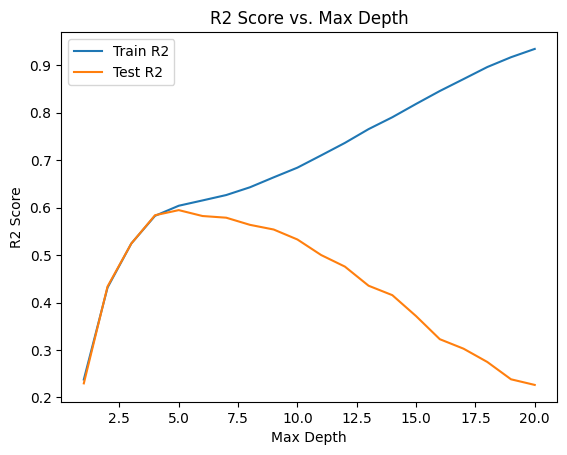

In [ ]:
#plot the scores to visually determine the best max_depth
plt.plot(scores.index, scores['Train R2'], label='Train R2')
plt.plot(scores.index, scores['Test R2'], label='Test R2')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('R2 Score vs. Max Depth')
plt.legend()
plt.show

#### Reevaluating Decision Tree Regressor Model

In [ ]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores['Test R2'].idxmax()
best_depth

5

In [ ]:
best_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
tree_pipe = make_pipeline(preprocessor, best_tree)
tree_pipe.fit(X_train, y_train)

print('Training Scores for High Variance Decision Tree')
evaluate_model(y_train, tree_pipe.predict(X_train), split = 'training')

print('\n')

print('Testing Scores for High Variance Decision Tree')
evaluate_model(y_test, tree_pipe.predict(X_test), split = 'testing')

Training Scores for High Variance Decision Tree
Results for training data:
  - R^2 = 0.604
  - MAE = 762.787
  - MSE = 1172265.669
  - RMSE = 1082.712



Testing Scores for High Variance Decision Tree
Results for testing data:
  - R^2 = 0.595
  - MAE = 738.654
  - MSE = 1118337.797
  - RMSE = 1057.515



The decision tree model demonstrates a balanced and stable performance across both training and testing datasets. The R² scores are 0.604 for training and 0.595 for testing, showing minimal variance and indicating that the model generalizes well to unseen data. Additionally, the error metrics (MAE, MSE, RMSE) are quite similar between the two datasets, further confirming the absence of overfitting or underfitting.